# MACHINE LEARNING INTRODUCTION

This cookbook contains recipes for some common applications of machine learning. You'll need a working knowledge of [pandas](http://pandas.pydata.org/), [matplotlib](http://matplotlib.org/), [numpy](http://www.numpy.org/), and, of course, [scikit-learn](http://scikit-learn.org/stable/) to benefit from it.

In [1]:
# show the matplotlib plotted graph within notebook lines.
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import required libraries
# pandas:Data framework library for Python
# sklearn: Library to perform machine learning tasks
import pandas 
import numpy as np
import scipy
import scipy.stats as st
import sklearn 
import sklearn.datasets
import sklearn.metrics as metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import mutual_info_classif
from scipy import stats

C:\Anaconda\envs\py35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda\envs\py35\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
# read in iris data from csv to pandas dataframe and display top 10 row
iris_df = pandas.read_csv('IRIS.csv')
iris_df.head(n=10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [4]:
# select feature attributes from pandas and convert into numpy array
features_df = iris_df[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
features = features_df.as_matrix()
features[:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [5]:
# select target attribute from pandas and convert into numpy array
target_df = iris_df['Target']
target = target_df.as_matrix()
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [8]:
# select distinct class labels from pandas
labels = iris_df['Species'].unique()
labels

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
mutual_info_classif(features, target)

array([ 0.48833853,  0.2531816 ,  0.9909301 ,  0.97631451])

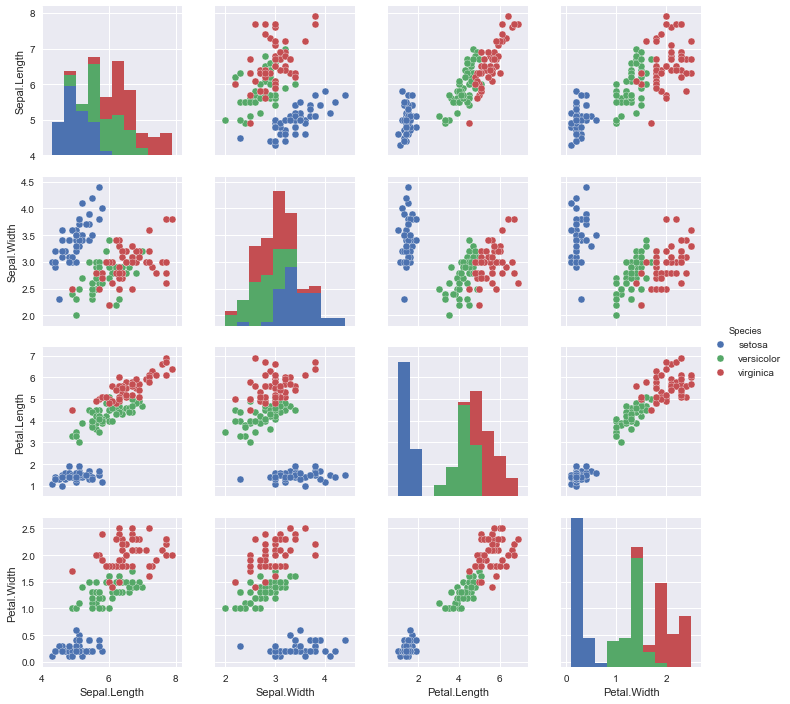

In [9]:
import seaborn as sns
sns.pairplot(iris_df, hue="Species",vars=["Sepal.Length",
                                          "Sepal.Width",
                                          "Petal.Length",
                                          "Petal.Width"])

## Logistic Regression


In [10]:
# <help:scikit_cross_validation>
# use log reg classifier
clf = LogisticRegression()

Training with splited train-test data set, 30% test data and 70% training data, the dataset will be randomly split again if you execute this statement again

In [11]:
# separate datasets into training and test datasets once, no folding
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3)

In [12]:
# train the features and target datasets and fit to a model
clfModel = clf.fit(features_train, target_train)
# predict target with feature test set using trained model
target_pred = clfModel.predict(features_test)

In [13]:
# display the confusion matrix by comparing the predicted target and actual test target. 
# The rows are actual and columns are predicted
pandas.DataFrame(metrics.confusion_matrix(target_test, target_pred), columns=labels, index=labels)

,setosa,versicolor,virginica
setosa,15,0,0
versicolor,0,15,2
virginica,0,0,13


In [14]:
print("The accuracy score for this training is",metrics.accuracy_score(target_test, target_pred))

The accuracy score for this training is 0.955555555556


## Now let's using differnt model (NaiveBayes)

In [15]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnbModel = gnb.fit(features_train, target_train)
target_predNB = gnbModel.predict(features_test)
pandas.DataFrame(metrics.confusion_matrix(target_test, target_predNB), columns=labels, index=labels)

,setosa,versicolor,virginica
setosa,15,0,0
versicolor,0,15,2
virginica,0,0,13


In [16]:
print("The accuracy score for this training is",metrics.accuracy_score(target_test, target_predNB))

The accuracy score for this training is 0.955555555556


Comparing to the accuracy result with CLF, GNB's accuracy score is lower.

## Training with k-Fold Cross-Validation

This recipe repeatedly trains a [logistic regression](http://en.wikipedia.org/wiki/Logistic_regression) classifier over different subsets (folds) of sample data. It attempts to match the percentage of each class in every fold to its percentage in the overall dataset ([stratification](http://en.wikipedia.org/wiki/Stratified_sampling)). It evaluates each model against a test set and collects the confusion matrices for each test fold into a `pandas.Panel`.


In [17]:
# initialize
cms = {}
scores   = []
cv = StratifiedKFold(target, n_folds=10)
for i, (train, test) in enumerate(cv):
    # train then immediately predict the test set
    clfModel = clf.fit(features[train], target[train])
    target_pred = clfModel.predict(features[test])
    # compute the confusion matrix on each fold, convert it to a DataFrame and stash it for later compute
    cms[i] = pandas.DataFrame(metrics.confusion_matrix(target[test], target_pred), columns=labels, index=labels)
    # stash the overall accuracy on the test set for the fold too
    scores.append(metrics.accuracy_score(target[test], target_pred))

# Panel of all test set confusion matrices
pl = pandas.Panel(cms)
cm = pl.sum(axis=0) #Sum the confusion matrices to get one view of how well the classifiers perform
cm

,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,45,5
virginica,0,2,48


In [18]:
print("The average of accuracy score for 10 stratified folds is",np.mean(scores))
print("The std dev of accuracy score for 10 stratified folds is",np.std(scores))
print("The std error of the mean accuracy score for 10 stratified folds is",stats.sem(scores))

The average of accuracy score for 10 stratified folds is 0.953333333333
The std dev of accuracy score for 10 stratified folds is 0.06
The std error of the mean accuracy score for 10 stratified folds is 0.02


In [19]:
st.t.interval(0.95, len(scores)-1, loc=np.mean(scores), scale=st.sem(scores))

(0.90809019007851355, 0.99857647658815318)

## SVM Classifier Hyperparameter Tuning with Grid Search

In [20]:
# randomize and separate datasets into training and test datasets once, no folding
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)

In [21]:
#<help_scikit_grid_search>
#define the parameter dictionary with the kernels of SVCs
parameters = [
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
]

# find the best parameters to optimize accuracy
svc_clf = SVC(C=1, probability= True)
clfSVM = GridSearchCV(svc_clf, parameters, cv=5, scoring='accuracy') #5 folds
clfSVM.fit(features_train, target_train) #train the model 
print("Best parameters found from SVM's:")
print(clfSVM.best_params_)
print("Best score found from SVM's:")    
print (clfSVM.best_score_)

Best parameters found from SVM's:
{'C': 1, 'kernel': 'linear'}
Best score found from SVM's:
0.9666666666666667


## K-Means Clustering Plots (Clustering - Unsupervised Learning)

This recipe performs a [K-means clustering](http://en.wikipedia.org/wiki/K-means_clustering) `k=1..n` times. It prints and plots the the within-clusters sum of squares error for each `k` (i.e., inertia) as an indicator of what value of `k` might be appropriate for the given dataset.

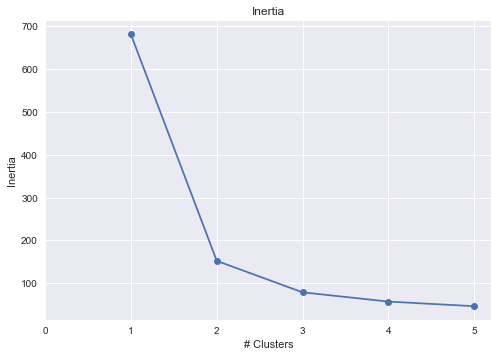

In [22]:
# <help:scikit_k_means_cluster>
import warnings
warnings.filterwarnings('ignore') #notebook outputs warnings, let's ignore them
from time import time
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.cluster import KMeans

# set the number of clusters, must be >=1
n = 6
inertia = [np.NaN]

# perform k-means clustering over i=0...k
for k in range(1,n):
    k_means_ = KMeans(n_clusters=k)
    k_means_.fit(features)
    #print('k = %d, inertia= %f' % (k, k_means_.inertia_ ))
    inertia.append(k_means_.inertia_) 
    
# plot the SSE of the clusters for each value of i
ax = plt.subplot(111)
ax.plot(inertia, '-o')
plt.xticks(range(n))
plt.title("Inertia")
ax.set_ylabel('Inertia')
ax.set_xlabel('# Clusters')
plt.show() 

## End for IRIS Lab

# BEGIN NOW WITH 20 newsgroup dataset FOR YOUR ASSIGNMENT 2

## Encoding for target labels
0=alt.atheism
1=comp.graphics
2=comp.os.ms-windows.misc   
3=comp.sys.ibm.pc.hardware
4=comp.sys.mac.hardware
5=comp.windows.x
6=misc.forsale
7=rec.autos
8=rec.motorcycles    
9=rec.sport.baseball
10=rec.sport.hockey
11=sci.crypt
12=sci.electronics
13=sci.med
14=sci.space
15=soc.religion.christian
16=talk.politics.guns
17=talk.politics.mideast
18=talk.politics.misc
19=talk.religion.misc

In [23]:
# extract data
!tar -xf 20news-19997.tar.gz -C .

In [24]:
# display newsgroups directories
!ls 20_newsgroups

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


In [25]:
import os
# create file directory for all files
files = []
folders = []
for (path, dirnames, filenames) in os.walk('20_newsgroups'):
    folders.extend(os.path.join(path, name) for name in dirnames)
    files.extend(os.path.join(path, name) for name in filenames)

In [26]:
# putting file directories into pandas dataframw
directorydf= pandas.DataFrame(files)
directorydf.columns = ['Directories']
directorydf.head(n=5)

,Directories
0,20_newsgroups\alt.atheism\49960
1,20_newsgroups\alt.atheism\51060
2,20_newsgroups\alt.atheism\51119
3,20_newsgroups\alt.atheism\51120
4,20_newsgroups\alt.atheism\51121


In [27]:
from collections import Counter
import re
import codecs
counter = Counter()
# Open the files and count the word frequency in each file in a loop and update the counter after finished processing a file
for rownum, row in enumerate(directorydf.itertuples()):
    with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
        counter.update([word for word in re.findall(r'\w+', myfile.read())])
    if (rownum % 1000 == 0):
        print("processed %d files" % (rownum+1))

processed 1 files
processed 1001 files
processed 2001 files
processed 3001 files
processed 4001 files
processed 5001 files
processed 6001 files
processed 7001 files
processed 8001 files
processed 9001 files
processed 10001 files
processed 11001 files
processed 12001 files
processed 13001 files
processed 14001 files
processed 15001 files
processed 16001 files
processed 17001 files
processed 18001 files
processed 19001 files


In [28]:
# opening up a sample file and display string
with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
    data=myfile.readlines()
data

['Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:121820 alt.atheism:54486 talk.religion.misc:84570 alt.tv.prisoner:4378\n',
 'Newsgroups: talk.abortion,alt.atheism,talk.religion.misc,alt.tv.prisoner\n',
 'Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!bogus.sura.net!news-feed-1.peachnet.edu!emory!nntp.msstate.edu!olivea!quack!pharvey\n',
 'From: pharvey@quack.kfu.com (Paul Harvey)\n',
 "Subject: Re: I'll see your demand and raise you... (was Re: After 2000 years etc)\n",
 'Message-ID: <f2ui5RH@quack.kfu.com>\n',
 "Organization: The Duck Pond public unix: +1 408 249 9630, log in as 'guest'.\n",
 'References: <kmr4.1697.735654694@po.CWRU.edu> \n',
 '\t<C64H4w.BFH@darkside.osrhe.uoknor.edu>\n',
 'Date: 27 Apr 1993 17:43:23 UTC\n',
 'Lines: 16\n',
 '\n',
 'In article <C64H4w.BFH@darkside.osrhe.uoknor.edu> \n',
 'bil@okcforum.osrhe.edu (Bill Conner) writes:\n',
 '>Keith M. Ryan (kmr4@po.CWRU.edu) wrote:\n',
 '>: And now . . . Deep Thoughts\n',
 '>: \tby Jack Handey.\n',
 ">: If you go parach

In [29]:
# find top k words occured most requent in the document
k = 5
topk = counter.most_common(k)
topk

[('the', 227368),
 ('edu', 155190),
 ('to', 126512),
 ('of', 120170),
 ('a', 100586)]

In [43]:
# create function to help encoding the targets
def label_target (d):
    if d.find("alt.atheism") > 0 :
      return 0
    if d.find("comp.graphics") > 0:
      return 1
    if d.find("comp.os.ms-windows.misc") > 0:
      return 2
    if d.find("comp.sys.ibm.pc.hardware") > 0:
      return 3
    if d.find("comp.sys.mac.hardware") > 0:
      return 4
    if d.find("comp.windows.x") > 0:
      return 5
    if d.find("misc.forsale") > 0:
      return 6
    if d.find("rec.autos") > 0:
      return 7
    if d.find("rec.motorcycles") > 0:
      return 8
    if d.find("rec.sport.baseball") > 0:
      return 9
    if d.find("rec.sport.hockey") > 0:
      return 10
    if d.find("sci.crypt") > 0:
      return 11
    if d.find("sci.electronics") > 0:
      return 12
    if d.find("sci.med") > 0:
      return 13
    if d.find("sci.space") > 0:
      return 14
    if d.find("soc.religion.christian") > 0:
      return 15
    if d.find("talk.politics.guns") > 0:
      return 16
    if d.find("talk.politics.mideast") > 0:
      return 17
    if d.find("talk.politics.misc") > 0:
      return 18
    if d.find("talk.religion.misc") > 0:
      return 19
    return 'Other'

In [1]:
np = []
# now we had top k words, count the frequecy (binary) of these words in individual file
for rownum, row in enumerate(directorydf.itertuples()):
    with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
        tempCounter = Counter([word for word in re.findall(r'\w+', myfile.read())])
        # if the word appears in the doc, then 1, else 
        topkinDoc = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        # create a list for top k words with encoded target and its label
        np.append(topkinDoc+[label_target(row.Directories)]+[row.Directories])
        if (rownum % 1000 == 0):
            print("processed %d files" % (rownum+1))

NameError: name 'directorydf' is not defined

In [45]:
newsgroupdf = pandas.DataFrame(np)
dfName = []
for c in topk:
    dfName.append(c[0])
dfName

['the', 'edu', 'to', 'of', 'a']

In [46]:
newsgroupdf.columns = dfName+['target','label']

In [47]:
newsgroupdf

,the,edu,to,of,a,target,label
0,1,1,1,1,1,0,20_newsgroups\alt.atheism\49960
1,1,1,1,1,1,0,20_newsgroups\alt.atheism\51060
2,1,1,1,1,1,0,20_newsgroups\alt.atheism\51119
3,1,1,1,1,1,0,20_newsgroups\alt.atheism\51120
4,1,1,1,1,0,0,20_newsgroups\alt.atheism\51121
5,1,1,1,1,1,0,20_newsgroups\alt.atheism\51122
6,1,1,1,1,1,0,20_newsgroups\alt.atheism\51123
7,1,1,1,1,1,0,20_newsgroups\alt.atheism\51124
8,1,1,1,1,1,0,20_newsgroups\alt.atheism\51125
9,1,1,0,1,0,0,20_newsgroups\alt.atheism\51126
